HW_6 by 22000690 정이주

1. Objective : Clustering

2. Input

  * Data file (mnist.pkl)

3. Output

  * Visualizing MNIST through PCA
  * 2-dim MNIST data
  * Data Normalization
  * Clustering Result
  * K-menas Result

# Week 10. Clustering 

## Exercise(1) Apply <font color='blue'>PCA algorithm

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('... loading data')
with open('data/mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

... loading data


In [2]:
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns=['label'])
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns=['label'])

In [3]:
from sklearn.decomposition import PCA

mypca = PCA(n_components = 2)
PCA_train_x = mypca.fit_transform(train_x)
PCA_test_x = mypca.transform(test_x)

In [4]:
print('PCA_train_x shape: ', PCA_train_x.shape)
print('PCA_test_x shape: ', PCA_test_x.shape)

PCA_train_x shape:  (50000, 2)
PCA_test_x shape:  (10000, 2)


Text(0, 0.5, 'Principal Component 2')

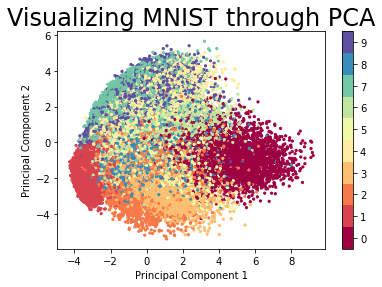

In [5]:
## Plot on the graph
# plt.scatter(...)
plt.scatter(PCA_train_x[:, 0],PCA_train_x[:, 1], s=5,c=train_y['label'], cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('Visualizing MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

### Let's use part of train_x data

In [6]:
# YOUR CODE STARTS HERE
sub_PCA_train_x = PCA_train_x[:1000, :]
print('sub_PCA_train_x.shape: ', sub_PCA_train_x.shape)

sub_PCA_train_x.shape:  (1000, 2)


In [7]:
# YOUR CODE STARTS HERE
sub_PCA_test_x = PCA_test_x[:1000, :]
print('sub_PCA_test_x.shape: ', sub_PCA_test_x.shape)

sub_PCA_test_x.shape:  (1000, 2)


## Exercise(2) - Hierarchical Clustering

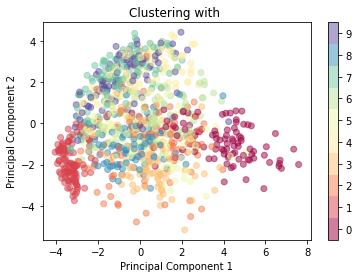

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

hier = AgglomerativeClustering(n_clusters=10, affinity='euclidean')
hier_clusters = hier.fit(sub_PCA_train_x)

## Plot 
plt.scatter(sub_PCA_train_x[:, 0], sub_PCA_train_x[:, 1], c=train_y['label'][:1000], cmap='Spectral', alpha=0.5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Clustering with ")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

----
## Exercise(3) k-means scratch
### <font color='brown'>3-Step(1) Normalize data

In [9]:
a = np.array([1, 3, 4])
A = np.tile(a, (3,1))
A

array([[1, 3, 4],
       [1, 3, 4],
       [1, 3, 4]])

two popular normalization methods
* min-max normalization
* mean-std normalization

In [10]:
def apply_normalizer(dataset, offset, divisor):
    dataset_normalized = np.zeros(dataset.shape)
    N = dataset.shape[0]
    # YOUR CODE STARTS HERE
    dataset_normalized = dataset - np.tile(offset, (N,1))
    dataset_normalized = dataset_normalized / np.tile(divisor, (N,1))

    return dataset_normalized


def normalize_minmax(dataset):
    # YOUR CODE STARTS HERE
    minval = dataset.min(0)
    maxval = dataset.max(0)
    
    dataset_normalized = apply_normalizer(dataset, minval, maxval-minval)

    return dataset_normalized, minval, maxval-minval


def normalize_meanstd(dataset):
    # YOUR CODE STARTS HERE
    meanval = dataset.mean(0)
    stdval = dataset.std(0)

    dataset_normalized = apply_normalizer(dataset, meanval, stdval)

    return dataset_normalized, meanval, stdval

In [11]:
normalized_PCA_train_x, off, div = normalize_minmax(sub_PCA_train_x)
print("Original data: ", sub_PCA_train_x[0], '\nNormalized data: ', normalized_PCA_train_x[0])
print("offset:", off, ";  divisor:", div, '\n')

normalized_PCA_train_x, off, div = normalize_meanstd(sub_PCA_train_x)
print("Original data: ", sub_PCA_train_x[0], '\nNormalized data: ', normalized_PCA_train_x[0])
print("offset:", off, ";  divisor:", div)

Original data:  [ 0.46148646 -1.246823  ] 
Normalized data:  [0.38819444 0.4091845 ]
offset: [-4.0606484 -5.165517 ] ;  divisor: [11.649149  9.576839] 

Original data:  [ 0.46148646 -1.246823  ] 
Normalized data:  [ 0.2443761  -0.63873076]
offset: [-0.07588012 -0.00491895] ;  divisor: [2.1989326 1.944331 ]


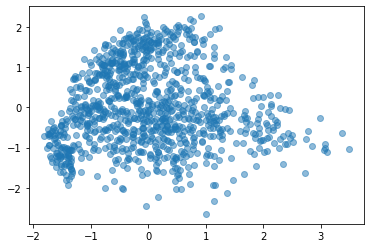

In [12]:
plt.scatter(normalized_PCA_train_x[:, 0], normalized_PCA_train_x[:, 1], cmap='Spectral', alpha=0.5)

 <font color='blue'>

**Q1: In the normalization methods, what is the meaning of offset and divisor, respectively?** <br>

**Q2: After normalization, how does the data range change?** <br>

 <font color='black'>

Hint: Try np.mean(X_normalized, axis=0), np.std(X_normalized, axis=0), np.min(X_normalized, axis=0), np.max(X_normalized, axis=0), np.median(X_normalized, axis=0).

A1 : Offset is used to correct background and quantile for between array normalization.
     Divisor is used the divisor to make the normalization range 0 and 1
     
A2: Data standardization procedures equlize the range and data variablilty.


In [13]:
# a distance function
def Euclidean_distance(vecA, vecB):
    return np.sqrt(sum(np.power([a - b for a, b in zip(vecA, vecB)], 2)))
    

### <font color='brown'>3-Step(2). Initialize centroids

In [17]:
k = int(input("How many cluster do you want? "))
print(k)

How many cluster do you want? 4
4


In [18]:
import random

def init_centroids_random(dataset, k):
    """
    Arguments:
    dataset -- Numpy array of PCA applied data
    k -- the number of clusters
    """
    # YOUR CODE STARTS HERE
    centroids = {}
    init_centroids = random.sample(range(0, len(dataset)), k)
    
    for i, c in enumerate(init_centroids):
        centroids[i] = dataset[c]
    return centroids

In [19]:
def init_centroids_index(dataset, k):
    """
    Arguments:
    dataset -- Numpy array of PCA applied data
    k -- the number of clusters
    """
    # YOUR CODE STARTS HERE
    centroids = {}
    for i in range(k):  # first k instances become the initial centroids
        centroids[i] = dataset[i]
        
    return centroids

In [20]:
# initialize_centroids(centroids, sub_PCA_train_x)
centroids = init_centroids_random(sub_PCA_train_x, k)

In [21]:
## Change centroids value to dataframe. 
cet_df = pd.DataFrame(centroids).transpose()
cet_df.columns = ['X', 'Y']
cet_df.head()

,X,Y
0,0.619154,1.911072
1,1.435139,-0.031189
2,4.450025,-1.470514
3,-1.391557,-0.034089


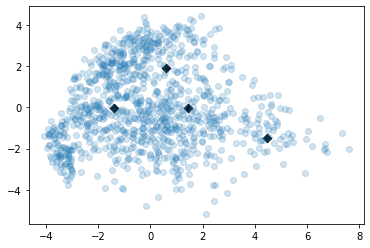

In [22]:
## Plot random centroids on the dataset
plt.figure()
plt.scatter(cet_df['X'], cet_df['Y'], color='black', marker = 'D')
plt.scatter(sub_PCA_train_x[:,0], sub_PCA_train_x[:, 1], alpha = 0.2)

### <font color='brown'>3-Step(3). (Re)assigning every datas to its _closest centroid_

In [23]:
def re_assign_data(dataset, centroids):
    """
    Arguments:
    dataset -- Numpy array of PCA applied data
    centroids -- A dictionary of centroids
    """
    cluster_memberships = {}
    for i in centroids:
        cluster_memberships[i] = []
    # (Re)assigning every instance to its closest centroid
    
    for row in dataset:
        ## YOUR CODE STARTS HERE
        # Calculate euclidean distance between each centroid and each data.
        distances_to_centroids = [Euclidean_distance(row, centroids[c]) for c in centroids]
        
        # Find the centroid with a minimum distance 
        membership = distances_to_centroids.index(min(distances_to_centroids))
        cluster_memberships[membership].append(row)
        
    return cluster_memberships

### <font color='brown'>3-Step(4). Recalculate average of each cluster and calculate SSE value

In [30]:
def re_calc_avg_sse(centroids, cluster_memberships):
    """
    Arguments:
    centroids -- A dictionary of centroids
    memberships -- A dictionary data which is clustered by key(key: clustered group, value: values of that group)
    """
    curr_sse = 0
    
    # Re-calculate the average of each cluster and calculate SSE.
    for membership in cluster_memberships:
        ## YOUR CODE STARTS HERE
        centroids[membership] = np.average(cluster_memberships[membership], axis=0)

        for row in cluster_memberships[membership]:
            curr_sse += np.power(Euclidean_distance(row, centroids[membership]), 2)
    
    return centroids, curr_sse            

###  <font color='brown'>3-Step(5). Iterate STEP3 and STEP4 until SSE is less than `tol` value 


In [31]:
## k-Means algorithm
def kmeans(dataset, k, max_iter = 300, tol = 0.001):
  
    centroids = init_centroids_random(dataset, k)
    
    ## 1. Initiate SSE which is key metric in k-means clustering (sse = sum of squared error) into 'np.inf'
    curr_sse = np.inf

    ## 2. Clustering
    for i in range(max_iter):

        ## (Re)Aassign datas to its closest centroids
        cluster_memberships = re_assign_data(dataset, centroids)

        prev_sse = curr_sse
        ## Re-calculate the average of each cluster and calculate SSE.
        centroids, curr_sse = re_calc_avg_sse(centroids, cluster_memberships)

        ## Plot center points
        plt.figure(i)
        c_df = pd.DataFrame(centroids).transpose()
        plt.scatter(c_df.loc[:, 0], c_df.loc[:, 1], color='black', marker='x')

        ## Plot assigned data
        for key in cluster_memberships:
            plt.scatter(*zip(*cluster_memberships[key]), alpha=0.2)
            plt.title('k={} '.format(k) + ' SSE=' + str(curr_sse))

        plt.show()
        print('iteration#{} | prev_sse= {:.4f};  curr_sse= {:.4f}'.format(i, prev_sse, curr_sse))

        # Terminal Condition
        if (prev_sse - curr_sse) / curr_sse < tol:
            break

    return cluster_memberships, curr_sse


 <font color='blue'>

**Q3: Before the iterations, how are the centroids defined?**<br>

**Q4: One metric to evaluate the clustering results is sum of squared error (SSE). Describe the meaning of SSE in terms of the relationship between data and centroids**<br>

**Q5: What is the terminal condition? Describe it with `tol` and `max_iter`.**

A3: It is difficult to classify data because the variance of the distance difference with each cluster is not constant.

A4: It is an indicator of how well the Prediction model predicted. SSE is a sum of all the squares of the errors between the actual observations and predictions

A5: In the terminal condition, the difference between the predicted value and the actual value is compared with tool to check whether there is no change in the center point while continuing the sentence by max_iter until the center point does not change.

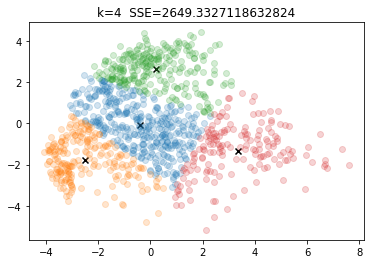

iteration#0 | prev_sse= inf;  curr_sse= 2649.3327


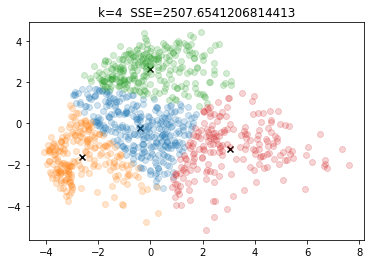

iteration#1 | prev_sse= 2649.3327;  curr_sse= 2507.6541


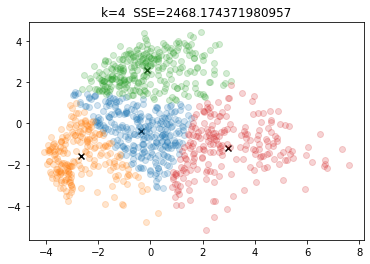

iteration#2 | prev_sse= 2507.6541;  curr_sse= 2468.1744


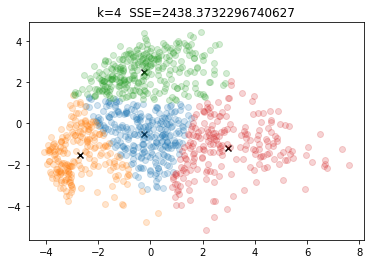

iteration#3 | prev_sse= 2468.1744;  curr_sse= 2438.3732


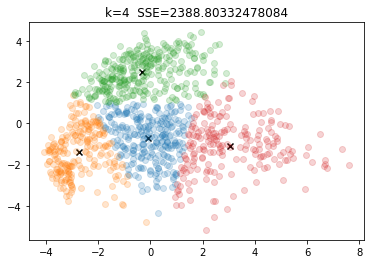

iteration#4 | prev_sse= 2438.3732;  curr_sse= 2388.8033


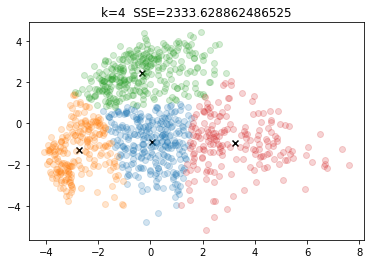

iteration#5 | prev_sse= 2388.8033;  curr_sse= 2333.6289


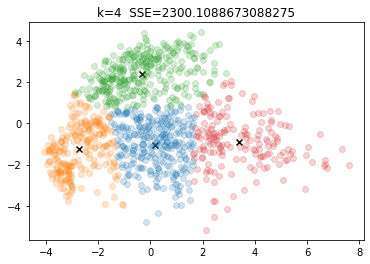

iteration#6 | prev_sse= 2333.6289;  curr_sse= 2300.1089


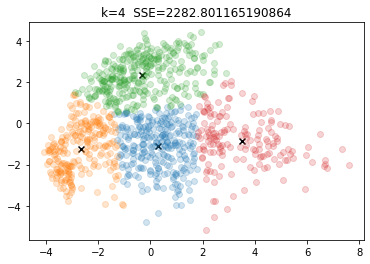

iteration#7 | prev_sse= 2300.1089;  curr_sse= 2282.8012


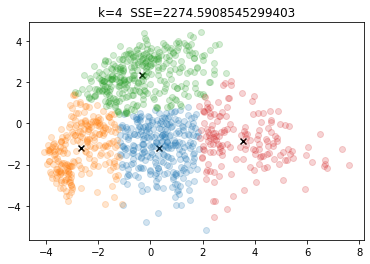

iteration#8 | prev_sse= 2282.8012;  curr_sse= 2274.5909


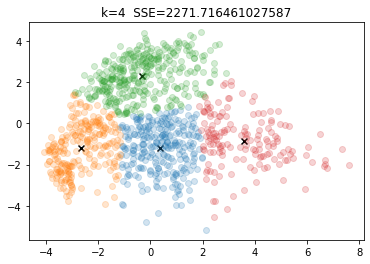

iteration#9 | prev_sse= 2274.5909;  curr_sse= 2271.7165


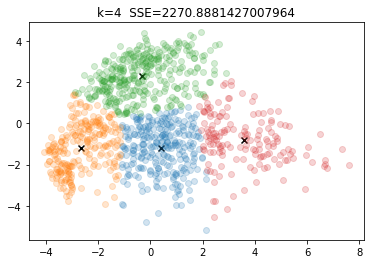

iteration#10 | prev_sse= 2271.7165;  curr_sse= 2270.8881


In [32]:
cluster_memberships, curr_sse = kmeans(sub_PCA_train_x, k)

----
### Step(6) Using sklearn library
- ___KMeans(n_clusters=)___ 

In [33]:
from sklearn.cluster import KMeans

## YOUR CODE STARTS HERE
model = KMeans(n_clusters=k)
model.fit(PCA_train_x)

result = model.predict(PCA_test_x)

- Check ___crosstab___

In [34]:
import pandas as pd

df = pd.DataFrame({'labels': test_y['label'], 'result': result})
ct = pd.crosstab(df['labels'], df['result'])
ct

result,0,1,2,3
labels,,,,
0,17,138,823,2
1,0,6,0,1129
2,81,611,146,194
3,31,730,92,157
4,881,6,11,84
5,148,442,155,147
6,247,367,253,91
7,854,17,3,154
8,138,552,107,177


A1 : Offset is used to correct background and quantile for between array normalization.
     Divisor is used the divisor to make the normalization range 0 and 1
     
A2: Data standardization procedures equlize the range and data variablilty.


A3: It is difficult to classify data because the variance of the distance difference with each cluster is not constant.

A4: It is an indicator of how well the Prediction model predicted. SSE is a sum of all the squares of the errors between the actual observations and predictions

A5: In the terminal condition, the difference between the predicted value and the actual value is compared with tool to check whether there is no change in the center point while continuing the sentence by max_iter until the center point does not change.